In [169]:
import pandas as pd
import numpy as np

In [170]:
d = pd.read_csv('trainCleanedROI_dateincluded.csv')

#Data preparation

In [171]:
d = d[['budget','revenue','ROI','genres1','genres2','genres3','original_language','production1','production2','production3','No of Production Companies','production_countries1','release_month','runtime','spoken_languages1','spoken_languages2','Gender.1','ReleaseDate']].copy()

In [172]:
d = d.rename(columns={'ReleaseDate':'year'})
d['year'] = pd.DatetimeIndex(d['year']).year
d = d[d['year'] > 1980]

In [173]:
d['genres1'] = d['genres1'].str.replace(r' ','')
d['genres2'] = d['genres2'].str.replace(r' ','')
d['genres3'] = d['genres3'].str.replace(r' ','')

In [174]:
d['roi']=(d.revenue-d.budget)/d.budget
d1 =d.drop(['ROI'], axis=1)
d=d1


In [175]:
d[d['roi']>10].count()

budget                        81
revenue                       81
genres1                       81
genres2                       56
genres3                       30
original_language             81
production1                   79
production2                   63
production3                   43
No of Production Companies    81
production_countries1         81
release_month                 81
runtime                       81
spoken_languages1             81
spoken_languages2             22
Gender.1                      81
year                          81
roi                           81
dtype: int64

In [176]:
d1=d[d['roi']<=10]
d=d1

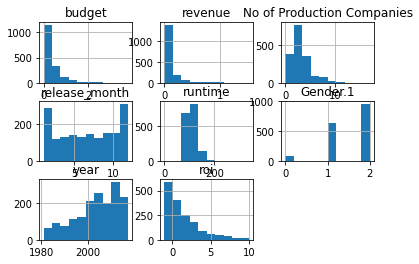

In [177]:
hist = d.hist(bins=10)

In [178]:
len(d)

1693

#Binning

In [179]:
#bins = np.array([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 , 10, 11, 12, 13])
#labels = ['a','b','c','d','e','f','g','h','i','l','m','n','o','p']

bins = np.array([-1, 1, 3, 5, 7])

#bins = np.array([-1, 0, 2, 4, 6])

labels = ['0','1','2','3']

d['y'] = pd.cut(d['roi'], bins, labels=labels)

In [180]:
d.head()

,budget,revenue,genres1,genres2,genres3,original_language,production1,production2,production3,No of Production Companies,production_countries1,release_month,runtime,spoken_languages1,spoken_languages2,Gender.1,year,roi,y
0,14000000,12314651,Comedy,NaN,NaN,en,Paramount Pictures,United Artists,Metro-Goldwyn-Mayer (MGM),3,United States of America,2,93,English,NaN,2.0,2015,-0.120382,0
1,40000000,95149435,Comedy,Drama,Family,en,Walt Disney Pictures,NaN,NaN,1,United States of America,6,113,English,NaN,1.0,2004,1.378736,1
2,3300000,13092000,Drama,NaN,NaN,en,Bold Films,Blumhouse Productions,Right of Way Films,3,United States of America,10,105,English,NaN,2.0,2014,2.967273,1
4,8000000,3261638,Animation,Adventure,Family,en,NaN,NaN,NaN,0,NaN,6,83,English,NaN,2.0,1987,-0.592295,0
5,14000000,85446075,Horror,Thriller,NaN,en,Ghost House Pictures,North Box Productions,NaN,2,United States of America,8,92,English,NaN,0.0,2012,5.103291,3


#Normalize continous `variables`:

In [181]:
dnum= d[['budget','revenue','release_month','runtime']].copy()

In [182]:
dnum

,budget,revenue,release_month,runtime
0,14000000,12314651,2,93
1,40000000,95149435,6,113
2,3300000,13092000,10,105
4,8000000,3261638,6,83
5,14000000,85446075,8,92
...,...,...,...,...
1972,13000000,91038276,12,112
1974,60000000,219417255,6,128
1975,65000000,89456761,11,120
1976,42000000,171963386,1,90


In [183]:
mean = dnum.mean(axis=0)
dnum -= mean
std = dnum.std(axis=0)
dnum /= std

In [184]:
dnum

,budget,revenue,release_month,runtime
0,-0.538623,-0.504598,-1.314085,-0.767611
1,0.074263,0.011670,-0.184916,0.195744
2,-0.790849,-0.499753,0.944254,-0.189598
4,-0.680058,-0.561021,-0.184916,-1.249289
5,-0.538623,-0.048807,0.379669,-0.815779
...,...,...,...,...
1972,-0.562196,-0.013953,1.508838,0.147576
1974,0.545714,0.786169,-0.184916,0.918260
1975,0.663576,-0.023810,1.226546,0.532918
1976,0.121408,0.490413,-1.596377,-0.912114


# Merge continous and categorical data and creation of dummy variables

In [185]:
d1=d[['y','genres1','genres2','genres3','original_language','production1','production2','production3','production_countries1','spoken_languages1','spoken_languages2','Gender.1','year']]

In [186]:
frames=[d1,dnum]
d = pd.concat(frames, axis=1)


In [187]:
d['y'].isna().sum()

65

In [188]:
d=d[~d['y'].isna()]

Transform categorical to dummy variables

In [189]:
d["genres1"] = d["genres1"].astype("category")
d["genres2"] = d["genres2"].astype("category")
d["genres3"] = d["genres3"].astype("category")

d["original_language"] = d["original_language"].astype("category")
d["production1"] = d["production1"].astype("category")
d["production2"] = d["production2"].astype("category")
d["production3"] = d["production3"].astype("category")

d["production_countries1"] = d["production_countries1"].astype("category")
d["spoken_languages1"] = d["spoken_languages1"].astype("category")
d["spoken_languages2"] = d["spoken_languages2"].astype("category")
d["Gender.1"] = d["Gender.1"].astype("category")
d['year'] = d['year'].astype('category')


In [190]:
d1 =d.loc[:, d.columns != 'y']

In [191]:
y=d.loc[:,d.columns=='y']

In [192]:
d = pd.get_dummies(d1)

In [193]:
d

,budget,revenue,release_month,runtime,genres1_Action,genres1_Adventure,genres1_Animation,genres1_Comedy,genres1_Crime,genres1_Documentary,genres1_Drama,genres1_Family,genres1_Fantasy,genres1_Foreign,genres1_History,genres1_Horror,genres1_Music,genres1_Mystery,genres1_Romance,genres1_ScienceFiction,genres1_Thriller,genres1_War,genres1_Western,genres2_Action,genres2_Adventure,genres2_Animation,genres2_Comedy,genres2_Crime,genres2_Documentary,genres2_Drama,genres2_Family,genres2_Fantasy,genres2_Foreign,genres2_History,genres2_Horror,genres2_Music,genres2_Mystery,genres2_Romance,genres2_ScienceFiction,genres2_Thriller,...,Gender.1_0.0,Gender.1_1.0,Gender.1_2.0,year_1981,year_1982,year_1983,year_1984,year_1985,year_1986,year_1987,year_1988,year_1989,year_1990,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017
0,-0.538623,-0.504598,-1.314085,-0.767611,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.074263,0.011670,-0.184916,0.195744,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.790849,-0.499753,0.944254,-0.189598,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,-0.680058,-0.561021,-0.184916,-1.249289,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,-0.538623,-0.048807,0.379669,-0.815779,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,-0.562196,-0.013953,1.508838,0.147576,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1974,0.545714,0.786169,-0.184916,0.918260,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1975,0.663576,-0.023810,1.226546,0.532918,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1976,0.121408,0.490413,-1.596377,-0.912114,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Import libraries

In [194]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from keras import regularizers


#### One-hot encoding of labels (categorical encoding)

In [195]:
y = to_categorical(y)

### Split datasets

In [196]:
xtrain, xrem, ytrain, yrem = train_test_split(d,y, train_size=0.7)
xval, xtest, yval, ytest = train_test_split(xrem, yrem, test_size=0.5)

In [197]:
print(len(xtrain), len(ytrain), len(xval), len(yval), len(xtest), len(ytest))

1139 1139 244 244 245 245


### Building the network

#### Architecture

- 2 intermediate Dense layers with 16 hidden unites per each (relu actovation function)
- 1 output layer (with softmax activation function)

Add dropouts
try differnt architectures add or remove layers
add l1 and or/ l2 regularization 
try different hyperparameters (number of units per layer or lerning rate of optimizer
add or remove features

In [198]:
tf.random.set_seed(11)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(2205,)))
model.add((layers.Dropout(0.5)))
model.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add((layers.Dropout(0.5)))
model.add(layers.Dense(4, activation='softmax'))

*Compile* **Loss function:** categorical crossentropy_ **Optimizer:** _rmsprop_




In [199]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.0001),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)

#### Training
- Define validation data
- Define epochs and batch size
- Fit the model

In [200]:
history = model.fit(
    xtrain,
    ytrain,
    epochs=100,
    batch_size=128,
    validation_data=(xval, yval)
)


Epoch 1/100
9/9 [==============================] - 1s 46ms/step - loss: 1.4316 - categorical_accuracy: 0.2651 - val_loss: 1.4111 - val_categorical_accuracy: 0.3852
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 1.4075 - categorical_accuracy: 0.3442 - val_loss: 1.3992 - val_categorical_accuracy: 0.4303
Epoch 3/100
9/9 [==============================] - 0s 11ms/step - loss: 1.4016 - categorical_accuracy: 0.3266 - val_loss: 1.3890 - val_categorical_accuracy: 0.4713
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 1.3930 - categorical_accuracy: 0.3652 - val_loss: 1.3797 - val_categorical_accuracy: 0.4918
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 1.3784 - categorical_accuracy: 0.3810 - val_loss: 1.3708 - val_categorical_accuracy: 0.5041
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 1.3625 - categorical_accuracy: 0.4328 - val_loss: 1.3617 - val_categorical_accuracy: 0.5082
Epoch 7/100
9/9 [=

### Plot results

#### Training and validation loss

<function matplotlib.pyplot.show>

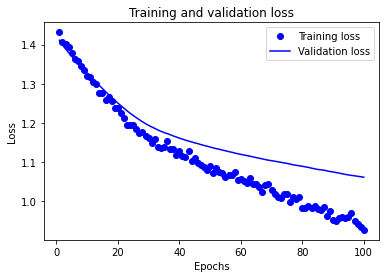

In [201]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['categorical_accuracy']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

In [202]:
history_dict.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

#### Training and validation accuracy

<function matplotlib.pyplot.show>

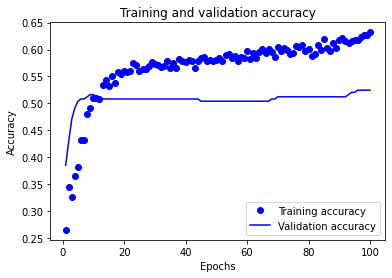

In [203]:
plt.clf()

acc_values = history_dict['categorical_accuracy']
val_acc_values = history_dict['val_categorical_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show

The graphs show that the model starts overfitting after ~10 epochs. Let's train it again with better hyperparameters

In [204]:
tf.random.set_seed(11)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(2205,)))
model.add((layers.Dropout(0.5)))
model.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add((layers.Dropout(0.5)))
model.add(layers.Dense(4, activation='softmax'))

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.0001),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)

model.fit(
    xtrain,
    ytrain,
    epochs=100,
    batch_size=512,
    validation_data=(xval, yval)
)
results = model.evaluate(xtest, ytest)


Epoch 1/100
3/3 [==============================] - 1s 179ms/step - loss: 1.4408 - categorical_accuracy: 0.2397 - val_loss: 1.4197 - val_categorical_accuracy: 0.3525
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 1.4209 - categorical_accuracy: 0.3099 - val_loss: 1.4134 - val_categorical_accuracy: 0.3689
Epoch 3/100
3/3 [==============================] - 0s 21ms/step - loss: 1.4215 - categorical_accuracy: 0.2871 - val_loss: 1.4082 - val_categorical_accuracy: 0.4098
Epoch 4/100
3/3 [==============================] - 0s 21ms/step - loss: 1.4164 - categorical_accuracy: 0.2968 - val_loss: 1.4037 - val_categorical_accuracy: 0.4180
Epoch 5/100
3/3 [==============================] - 0s 22ms/step - loss: 1.4046 - categorical_accuracy: 0.3205 - val_loss: 1.3995 - val_categorical_accuracy: 0.4262
Epoch 6/100
3/3 [==============================] - 0s 24ms/step - loss: 1.3970 - categorical_accuracy: 0.3415 - val_loss: 1.3952 - val_categorical_accuracy: 0.4426
Epoch 7/100
3/3

In [205]:
print(results)

[1.095190405845642, 0.5714285969734192]


In [206]:
model.predict(xtest)

array([[0.47839475, 0.24703369, 0.13947572, 0.13509582],
       [0.51814103, 0.22512834, 0.12414438, 0.1325863 ],
       [0.44736814, 0.24858488, 0.14818813, 0.15585883],
       [0.52904683, 0.22442913, 0.11936431, 0.1271597 ],
       [0.53531504, 0.21603663, 0.11682756, 0.13182075],
       [0.49018118, 0.26098332, 0.11674184, 0.13209374],
       [0.63027   , 0.18582663, 0.08463621, 0.0992672 ],
       [0.51433957, 0.20776053, 0.1376698 , 0.1402301 ],
       [0.5750951 , 0.21505107, 0.103328  , 0.10652575],
       [0.5038738 , 0.24745978, 0.12932944, 0.1193369 ],
       [0.55324376, 0.22691788, 0.10469985, 0.11513853],
       [0.5493395 , 0.22068693, 0.1165927 , 0.11338092],
       [0.56788504, 0.20751363, 0.10378341, 0.12081788],
       [0.53046423, 0.2253336 , 0.11662114, 0.12758097],
       [0.53405243, 0.2172584 , 0.12128171, 0.1274075 ],
       [0.4815536 , 0.24331698, 0.1347227 , 0.14040667],
       [0.4897454 , 0.20931262, 0.15949251, 0.14144954],
       [0.5657654 , 0.19731706,



```
# This is formatted as code
```

With this approach we obtained an accuracy of ~54%.